In [2]:
# Setup Dependencies
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
# from matplotlib import colors as mcolors
import numpy as np
import pandas as pd

rank_data = pd.read_csv("./Resources/collegeRanksCSV.csv")

In [3]:
rank_data.head()

,SCHOOL,2008,2009,2010,2011,2012,2013,2014,2015,AVG RANK,CHG 08 VS 15
0,Princeton,1,2,1,2,1,1,1,1,1.250,0
1,Harvard,2,1,1,1,1,1,2,2,1.375,0
2,Yale,3,3,3,3,3,3,3,3,3.000,0
3,Stanford,4,4,4,5,5,6,5,4,4.625,0
4,Columbia,9,8,8,4,4,4,4,4,5.625,5


In [4]:
school=rank_data['SCHOOL']
rank_08 = rank_data['2008']
rank_09 = rank_data['2009']
rank_10 = rank_data['2010']
rank_11 = rank_data['2011']
rank_12 = rank_data['2012']
rank_13 = rank_data['2013']
rank_14 = rank_data['2014']
rank_15 = rank_data['2015']
change = rank_data['CHG 08 VS 15']

In [28]:
rank_change=rank_data.sort_values(by='CHG 08 VS 15', ascending=False)
top_10_change =rank_change.head(10)

In [29]:
top_10_change

,SCHOOL,2008,2009,2010,2011,2012,2013,2014,2015,AVG RANK,CHG 08 VS 15
69,Northeastern,96,96,80,69,62,56,49,42,68.750,54
98,TCU,108,113,110,99,97,92,82,76,97.125,32
95,Massachusetts Amherst,96,102,106,99,94,97,91,76,95.125,20
74,Brigham Young,79,113,71,75,71,68,62,62,75.125,17
103,Florida St,112,102,102,104,101,97,91,95,100.500,17
52,Boston Univ,57,60,56,56,53,51,41,42,52.000,15
114,Univ at Buffalo,118,121,121,120,111,106,109,103,113.625,15
83,Clark,91,80,88,86,94,83,75,76,84.125,15
80,American,85,83,84,79,82,77,75,71,79.500,14
92,Drexel,108,89,88,86,88,83,97,95,91.750,13


In [30]:
rank_change=rank_data.sort_values(by='CHG 08 VS 15', ascending=True)
bottom_10_change =rank_change.head(10)

In [31]:
bottom_10_change

,SCHOOL,2008,2009,2010,2011,2012,2013,2014,2015,AVG RANK,CHG 08 VS 15
115,Howard,96,102,96,104,111,120,142,145,114.500,-49
113,Arizona,96,96,102,120,124,120,119,121,112.250,-25
93,Iowa St,85,89,88,94,94,101,101,106,94.750,-21
100,Kansas,85,89,96,104,101,106,101,106,98.500,-21
107,Pacific,96,102,115,99,101,106,112,116,105.875,-20
118,Washington St,118,116,106,111,115,125,128,138,119.625,-20
109,Illinois Tech,96,102,106,111,111,113,109,116,108.000,-20
90,St. Louis,82,80,84,86,88,92,101,99,89.000,-17
102,UC Riverside,96,89,96,94,97,101,112,113,99.750,-17
120,Ohio Univ,112,116,115,124,124,131,135,129,123.250,-17


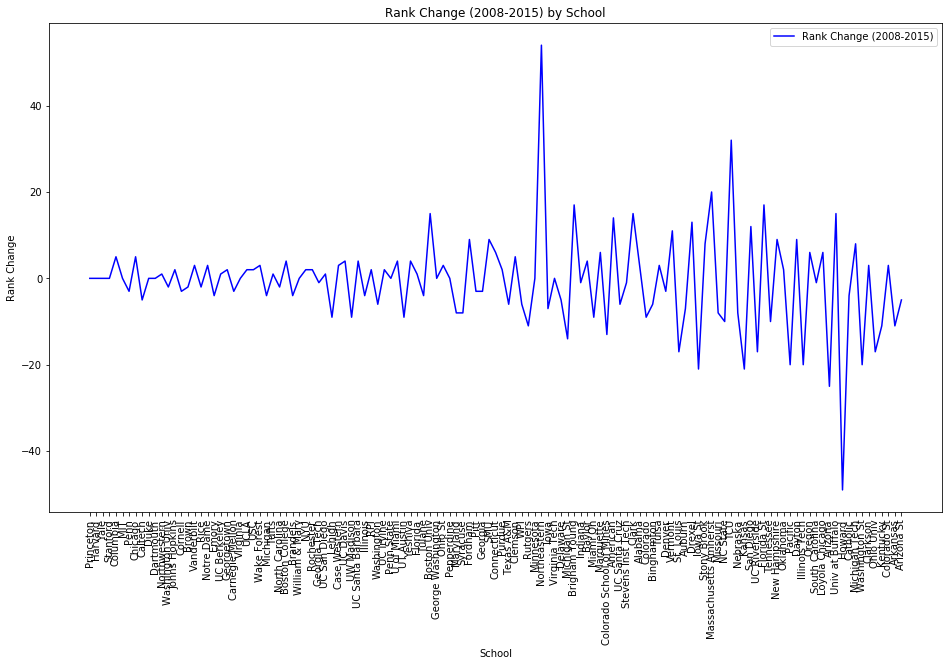

In [15]:
#Build Plot for Rank Change
rank_change= plt.plot(school, change, color="blue", label="Rank Change (2008-2015)" )
plt.legend()
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = [16,9]
plt.title("Rank Change (2008-2015) by School")
plt.ylabel("Rank Change")
plt.xlabel("School")
plt.show()

In [6]:
#Northeastern
max(change)

54

In [7]:
#Howard University 
min(change)

-49

In [16]:
# #Plotting Yearly Data
# data_08= plt.plot(school, rank_08, label="2008 Ranks")
# data_09= plt.plot(school, rank_09, label="2009 Ranks")
# data_10= plt.plot(school, rank_10, label="2010 Ranks")
# data_11= plt.plot(school, rank_11, label="2011 Ranks")
# data_12= plt.plot(school, rank_12, label="2012 Ranks")
# data_13= plt.plot(school, rank_13, label="2013 Ranks")
# data_14= plt.plot(school, rank_14, label="2014 Ranks")
# data_15= plt.plot(school, rank_15, label="2015 Ranks")


# plt.legend()
# plt.xticks(rotation = 85)
# plt.rcParams["figure.figsize"] = [16,9]
# plt.title("Rank Data by Year")
# plt.ylabel("Rank")


# plt.xlabel("School")

# plt.show()

In [17]:
# # Create the figure
# fig = plt.figure()
# ax = fig.add_subplot(111)

# for i in list(range(len(school))):
#     # Plot the line between dumbbells
#     ax.plot([rank_08[i], rank_09[i]], [i, i], color='black')
#     # Plot the dumbbells.
#     ax.plot(rank_08[i], i, color='red', marker='o')
#     ax.plot(rank_09[i], i, color='blue', marker='o')
    
# # Adjust and show the plot
# plt.rcParams["figure.figsize"] = [16,9]
# plt.show()



In [18]:
# #Plotting Yearly Data

# #Construct Plot
# fig = plt.figure()
# ax = fig.gca(projection='3d')

# #Labels
# plt.title("College Rank Data by Year")
# ax.set_xlabel('Year')
# ax.set_ylabel('School')
# ax.set_zlabel('Rank')

# # Set the limits of the x axis
# plt.xlim(-0.25, len(x_axis)-0.25)
# year = ['2008','2009','2010','2011','2012','2013','2014','2015']
# x_axis = np.arange(len(year))
# xtick_locations = [value for value in x_axis]
# plt.xticks(xtick_locations, year)

# # Set the limits of the y axis
# plt.ylim(0, len(y_axis)+10)
# y_axis = np.arange(len(school))
# ytick_locations = [value for value in y_axis]
# plt.yticks(ytick_locations, school)
# plt.yticks(rotation = 90)

# plt.legend(school)

# #plt.rcParams["figure.figsize"] = [16,9]

# z_axis = np.arange(0, 125, 5)

# plt.show()

In [19]:
#Filter for Yearly Rank Data Only
df = rank_data.drop(['AVG RANK', 'CHG 08 VS 15'], axis=1)
df = df.set_index('SCHOOL')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, Princeton to Arizona St
Data columns (total 8 columns):
2008    125 non-null int64
2009    125 non-null int64
2010    125 non-null int64
2011    125 non-null int64
2012    125 non-null int64
2013    125 non-null int64
2014    125 non-null int64
2015    125 non-null int64
dtypes: int64(8)
memory usage: 8.8+ KB


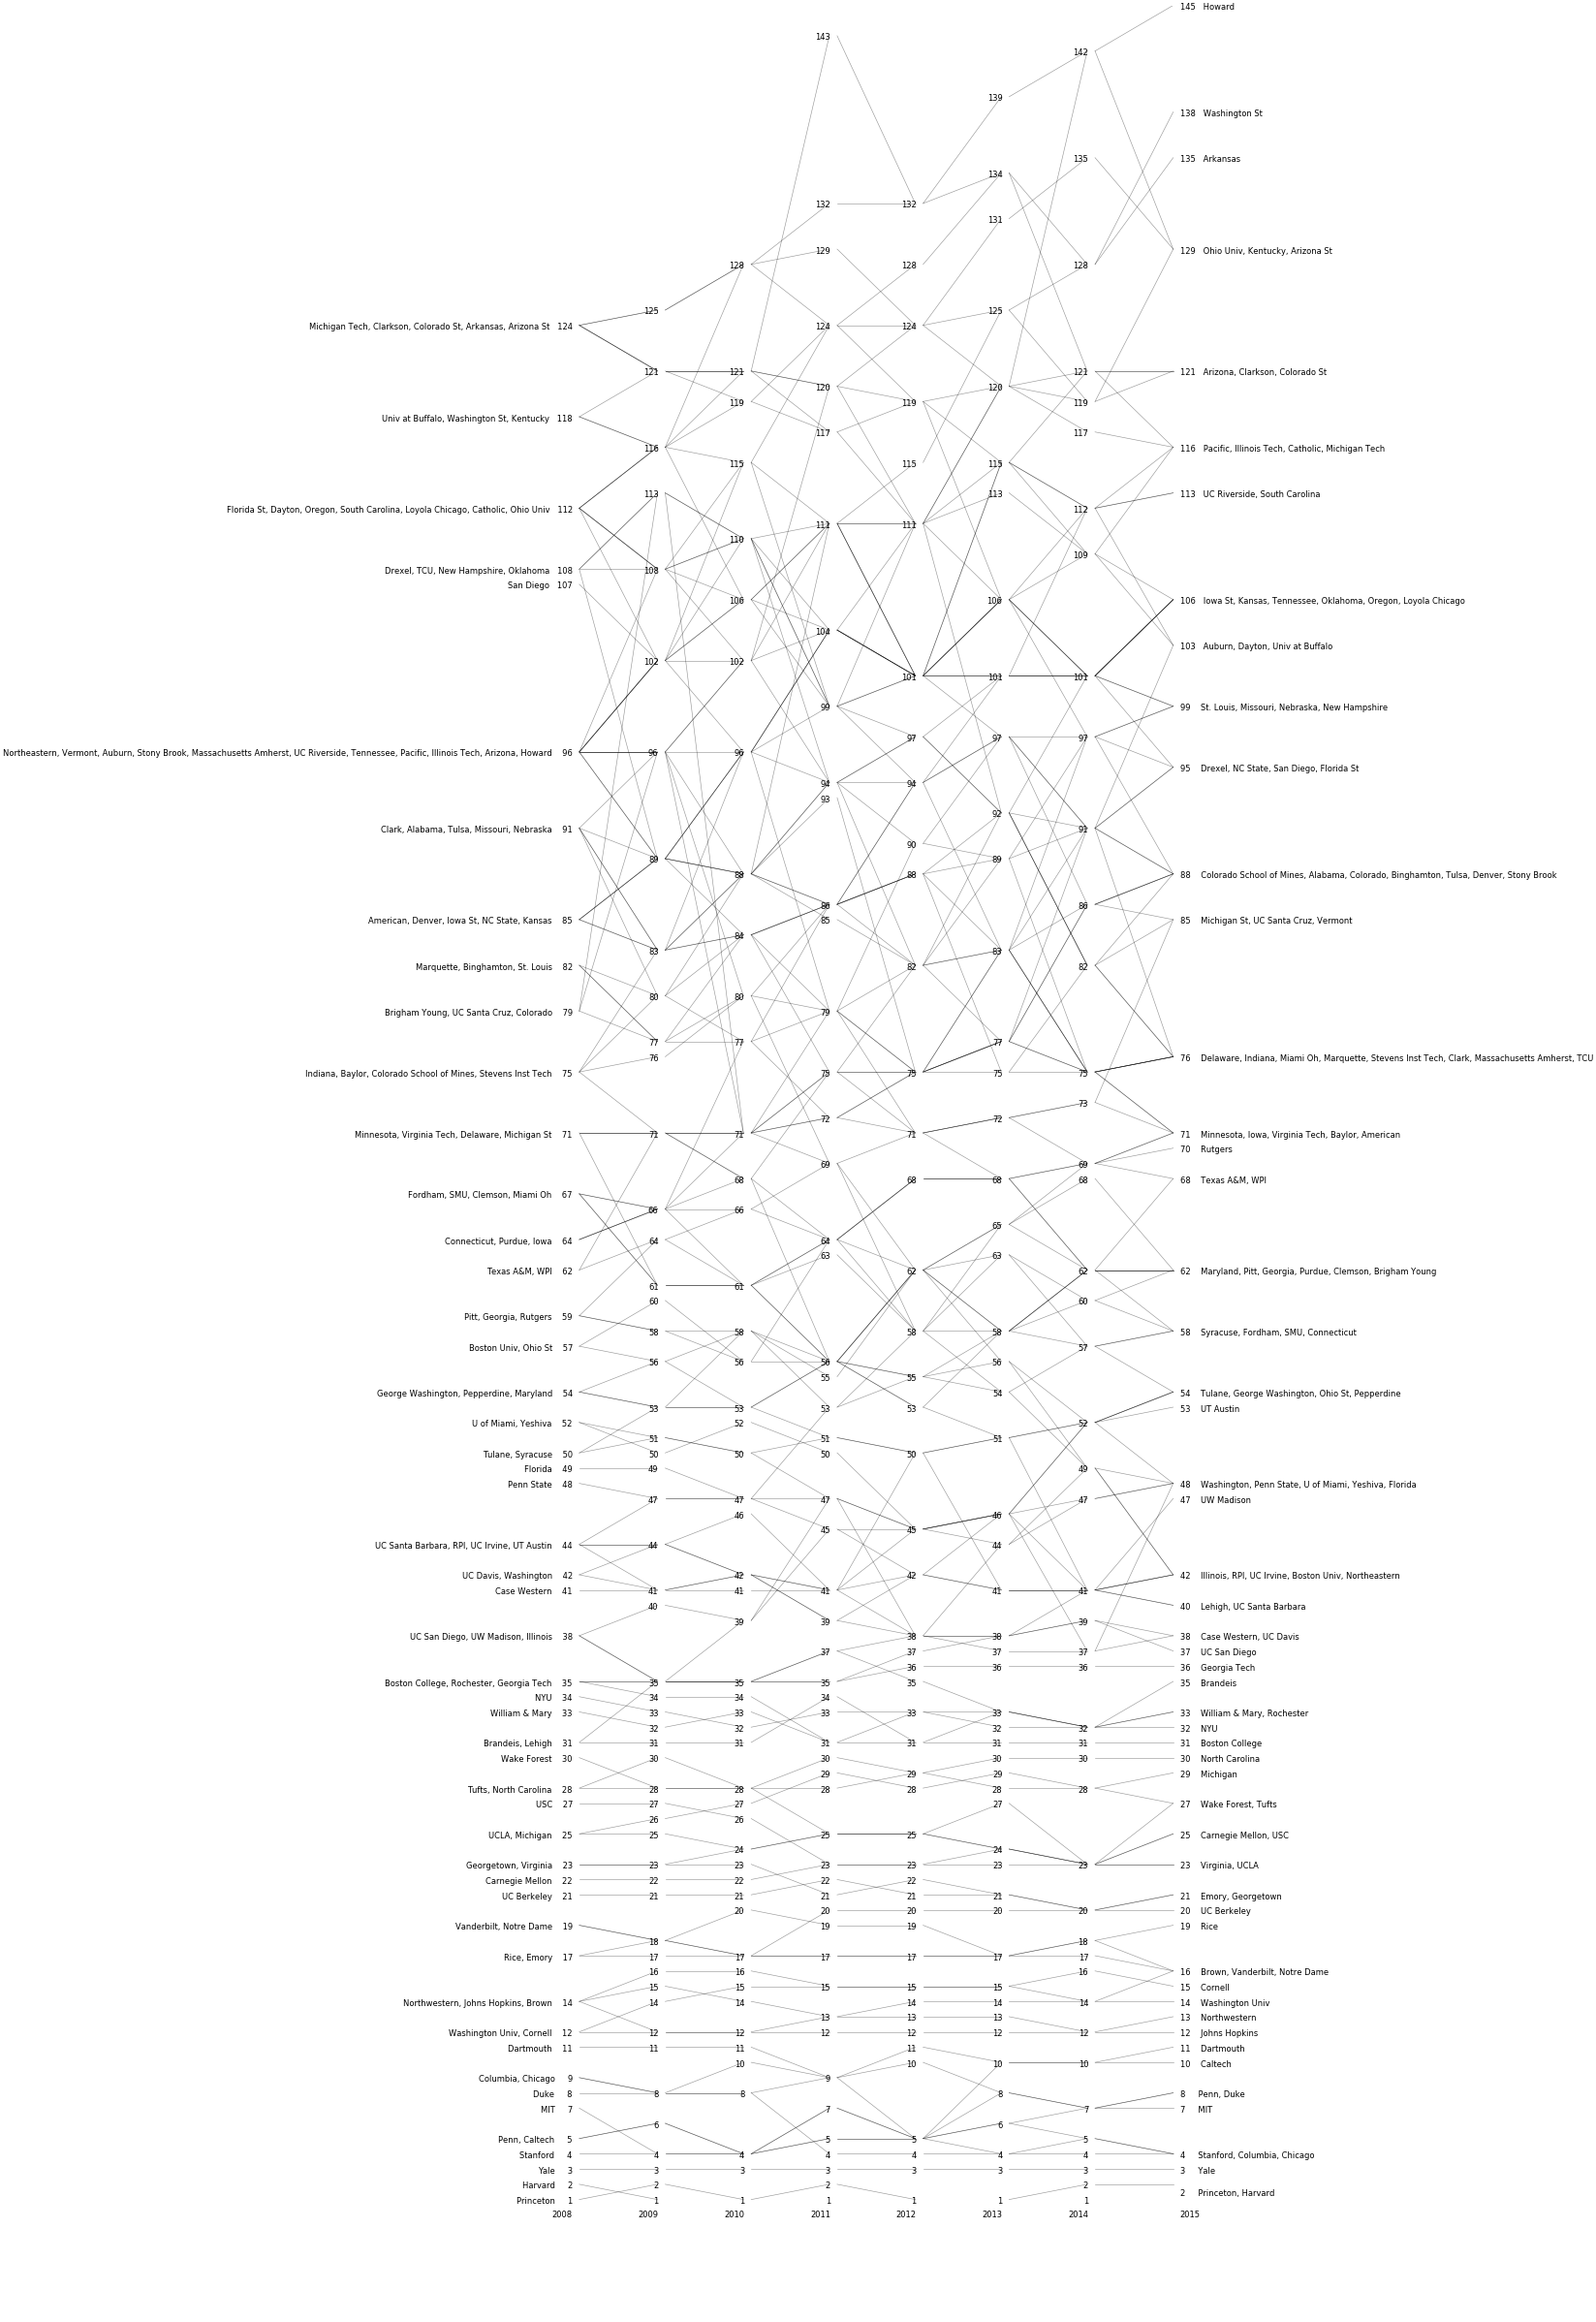

In [21]:
#Make Bump Chart
from plotSlope import slope
f = slope(df,height=80,width=55,font_size=20, savename='rank.png')  